# 911 Calls Project

In this notebook I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [279]:
import numpy as np

In [280]:
import pandas as pd

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [282]:
df  = pd.read_csv('911.csv')

    First of all, let's see what are we dealing with.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [345]:
df.describe()

,lat,lng,zip,Hour
count,99492.000000,99492.000000,86637.000000,99492.000000
mean,40.159526,-75.317464,19237.658298,13.117085
std,0.094446,0.174826,345.344914,5.671564
min,30.333596,-95.595595,17752.000000,0.000000
25%,40.100423,-75.392104,19038.000000,9.000000
50%,40.145223,-75.304667,19401.000000,14.000000
75%,40.229008,-75.212513,19446.000000,17.000000
max,41.167156,-74.995041,77316.000000,23.000000


In [284]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [346]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
Reason           0
Hour             0
Month            0
DayOfWeek        0
Date             0
dtype: int64

Since we have a full columns of exact coordinates we will not be worrying about missing values since we will not be needing thos columns

In [285]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [286]:
df['title'].nunique()

110

## Feature engineering

First what we can do is separate emergency call 'Reason' from the 'title' field.



In [287]:
df['Reason'] = df['title'].apply( lambda str: str.split(':')[0])
df['title'] = df['title'].apply( lambda str: str.split(':')[1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


We drop the 'e' field because of the lack of information it carries.

In [288]:
df['e'].nunique()

1

In [289]:
df.drop(columns=['e'], inplace = True)

In [290]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


## We start our analysis from the 'Reason' column

In [291]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

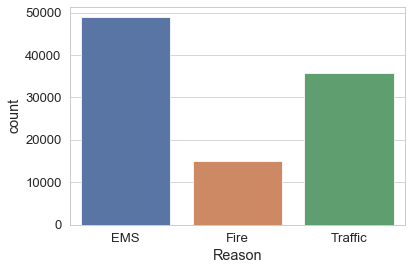

In [292]:
sns.countplot(x = df['Reason'])

In [293]:

type(df['timeStamp'][0])


str

In [294]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [295]:
df['Hour']= df['timeStamp'].apply(lambda timestamp: timestamp.hour)
import calendar
df['Month']= df['timeStamp'].apply(lambda timestamp: calendar.month_abbr[timestamp.month])
df['DayOfWeek']= df['timeStamp'].apply(lambda timestamp: calendar.day_abbr[timestamp.weekday()])

df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,Dec,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,Dec,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,Dec,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,Dec,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,Dec,Thu


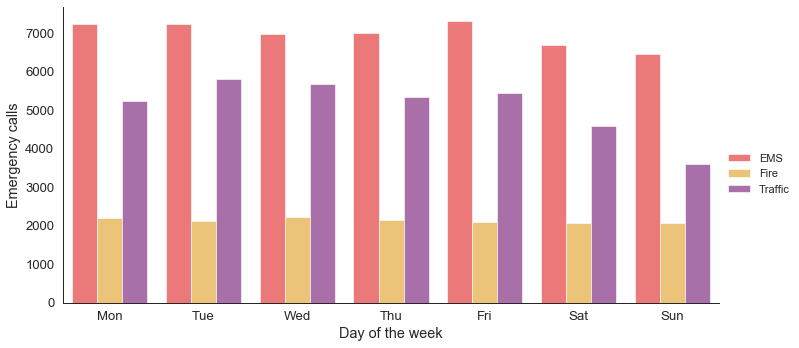

In [296]:
with sns.axes_style("white"):
    pal = dict(EMS="red", Fire="orange", Traffic='purple')
    g = sns.FacetGrid(df, height=5, aspect = 2)
    sns.set_context('notebook',font_scale=1)
    g.map(sns.countplot, 'DayOfWeek',palette = pal, alpha=.6,order = list(calendar.day_abbr), hue = df['Reason'])
    g.set_axis_labels('Day of the week', 'Emergency calls')
    g.add_legend()

**Now let's do the same for Month:**

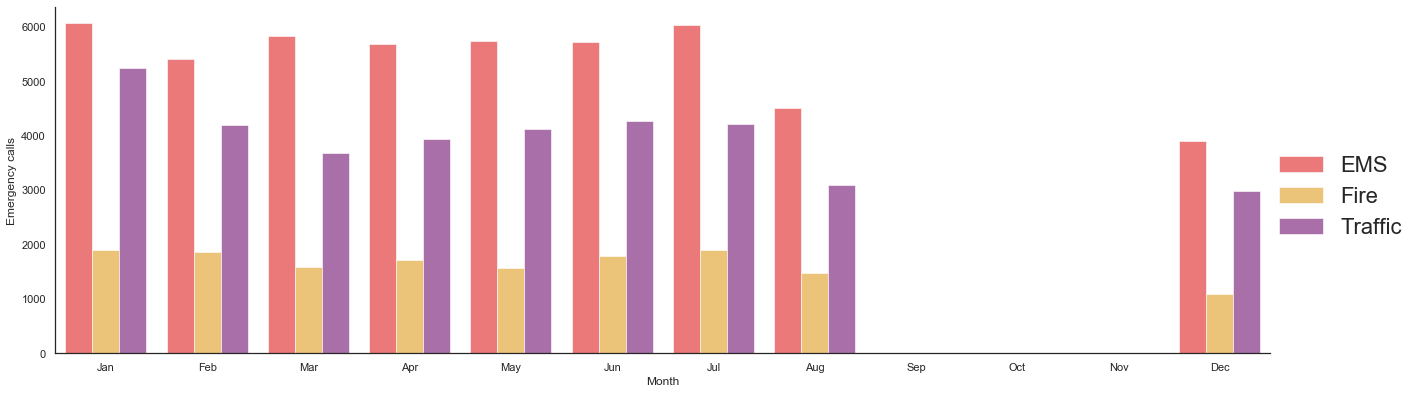

In [297]:
with sns.axes_style("white"):
    pal = dict(EMS="red", Fire="orange", Traffic='purple')
    g = sns.FacetGrid(df, height=6, aspect = 3)
    sns.set_context('notebook',font_scale=2)
    g.map(sns.countplot, 'Month', palette = pal, alpha=.6,order = list(calendar.month_abbr)[1:], hue = df['Reason'])
    g.set_axis_labels('Month', 'Emergency calls')
    g.add_legend()


**We immidiately notice a lack of data from several months**

What we can do is try to plot the data so we coluld tell if there is a trend, clear enough to allow as to infere the lacking months values.

In [298]:
byMonth = df.groupby('Month').count()
byMonth.index = [ calendar.month_abbr[:].index(x) for x in list(byMonth.index) ]
byMonth.sort_index(inplace = True)


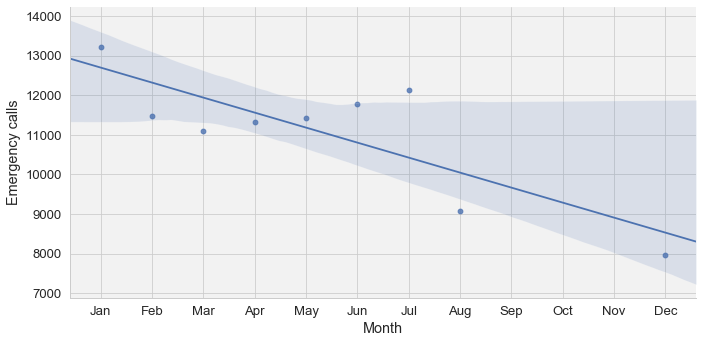

In [301]:
sns.set()
with sns.axes_style("whitegrid", {"axes.facecolor": ".95"}):
    sns.set_context('paper',font_scale=1.5)
    g = sns.lmplot(x = 'index', y = 'title' ,  data = byMonth.reset_index(), height=5, aspect=2)
    plt.xticks(ticks = np.arange(1,13), labels=calendar.month_abbr[1:])
    plt.ylabel('Emergency calls')
    plt.xlabel('Month')

The data appears to be far from linear, therefore with only 9 elements of time series, 3 missing, we cannot infere the missing part with satisfying certainty from a linear, nor as it seams - any model.

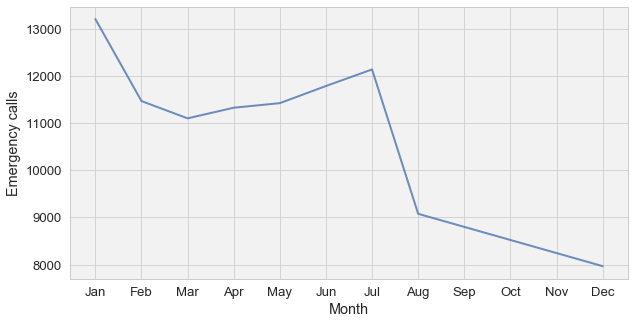

In [299]:
sns.set()
with sns.axes_style("whitegrid", {"axes.facecolor": ".95"}):
    sns.set_context('paper',font_scale=1.5)
    plt.figure(figsize=(10,5))
    g = sns.lineplot(x = 'index', y = 'title' ,  data = byMonth.reset_index(), linewidth=2, alpha=0.8, sort=False)
    plt.xticks(ticks = np.arange(1,13), labels=calendar.month_abbr[1:])
    plt.ylabel('Emergency calls')
    plt.xlabel('Month')

We can still look at what we do have in terms of heatmaps

In [198]:
mon_h = df.groupby(['Month','Hour']).count().pivot_table(index = 'Month', columns = 'Hour', values = 'lat')

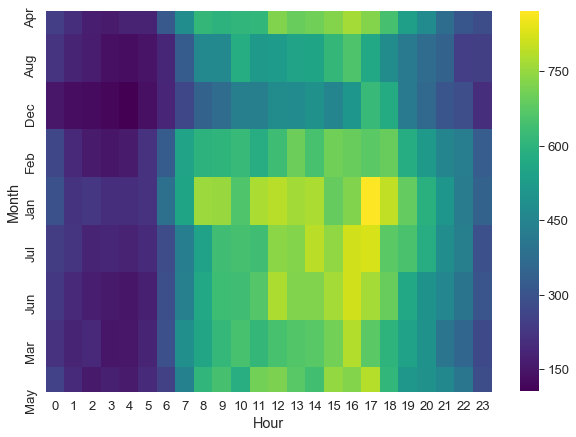

In [117]:
plt.figure(figsize=(10,7))
ht = sns.heatmap(mon_h, cmap='viridis')

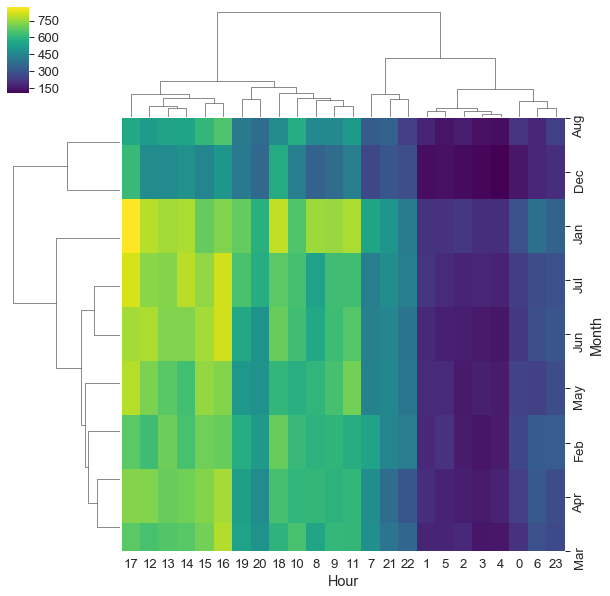

In [118]:
sns.clustermap(mon_h, cmap='viridis')

In [119]:
day_h = df.groupby(['DayOfWeek','Hour']).count().pivot_table(index = 'DayOfWeek', columns = 'Hour', values = 'lat')

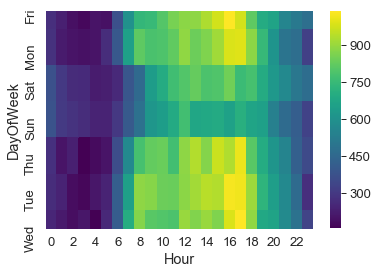

In [120]:
ht = sns.heatmap(day_h, cmap='viridis')


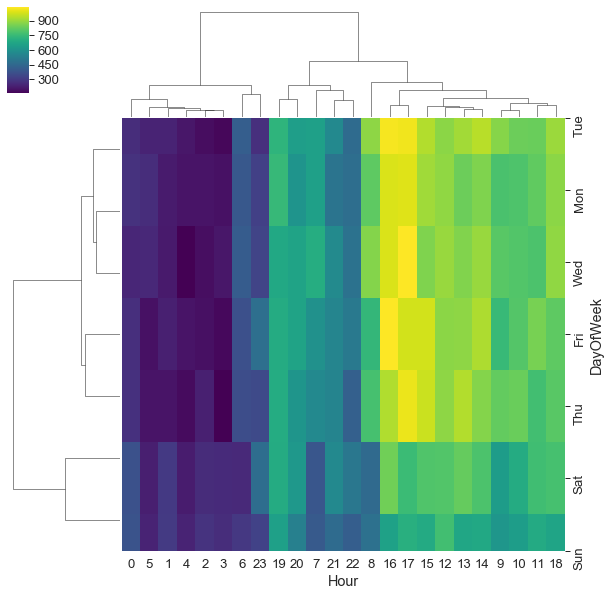

In [121]:
sns.clustermap(day_h, cmap='viridis')

And now for further visualizaton we can look at some plots that help us compae the data and visualize them geographically

In [302]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.head()['timeStamp']


0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [303]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.2.1


In [304]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [305]:
gdf = df.groupby(['Date','Reason']).count().pivot_table(values = 'lat', columns = 'Reason', index = 'Date')

In [306]:
gdf.iplot(kind='spread')

In [307]:
import plotly.express as px

In [308]:
df[['lng','lat']].describe()

,lng,lat
count,99492.000000,99492.000000
mean,-75.317464,40.159526
std,0.174826,0.094446
min,-95.595595,30.333596
25%,-75.392104,40.100423
50%,-75.304667,40.145223
75%,-75.212513,40.229008
max,-74.995041,41.167156


In [309]:
from sklearn.cluster import KMeans

In [310]:
geo_points = pd.DataFrame(data = list(zip(list(zip(df['lat'],df['lng'])),df['Reason'])),columns=['Coordinates','Reason'])

In [311]:
cat_points = geo_points.groupby('Reason')

In [312]:
A = np.array([(x,y) for (x,y) in cat_points.get_group('Traffic')['Coordinates'] ])
B = np.array([(x,y) for (x,y) in cat_points.get_group('EMS')['Coordinates'] ])
C = np.array([(x,y) for (x,y) in cat_points.get_group('Fire')['Coordinates'] ])


In [313]:
cat_points.count()

,Coordinates
Reason,
EMS,48877
Fire,14920
Traffic,35695


In [330]:
def cluster_count( clusters ):
    a = clusters.labels_
    
    return [np.count_nonzero(a == x, axis=0) for x in np.arange(max(a)+1) ]

In [340]:
CLUSTERS = [18,24,14]
kmeans = KMeans(n_clusters=CLUSTERS[0]).fit(A)
A_geo = np.array(list(zip( cluster_count(kmeans),kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], ['Traffic' for x in np.arange(CLUSTERS[0])])))

kmeans = KMeans(n_clusters=CLUSTERS[1]).fit(B)
B_geo = np.array(list(zip( cluster_count(kmeans),kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], ['EMS' for x in np.arange(CLUSTERS[1])])))

kmeans = KMeans(n_clusters=CLUSTERS[2]).fit(C)
C_geo = np.array(list(zip( cluster_count(kmeans),kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], ['Fire' for x in np.arange(CLUSTERS[2])])))



In [341]:
geo_data = pd.DataFrame(data = np.concatenate((A_geo,B_geo,C_geo)), columns=['Count','Latitude','Longitude','Reason'])

In [342]:
geo_data = geo_data.astype({'Count': 'float64','Latitude': 'float64','Longitude': 'float64','Reason': 'str'})

In [343]:
px.scatter_geo(data_frame = geo_data, lat = 'Latitude', lon='Longitude', scope='usa', size='Count', color='Reason' )
